In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [3]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# TUGAS 1 #

### Mengatasi data null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [5]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

*nilai null dihapus:*

SkorKepuasanPegawai                     
JumlahKeikutsertaanProjek               
JumlahKeterlambatanSebulanTerakhir
JumlahKetidakhadiran 
AlasanResign 

*kolom dihapus:*

IkutProgramLOP 

In [6]:
#kolom dihapus
df.drop('IkutProgramLOP', axis=1, inplace=True)

In [7]:
#nilai null dihapus
df = df.dropna()

In [8]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

### Mengganti value yang tidak sesuai ###

In [9]:
object_columns = df.select_dtypes(include='object')

In [10]:
object_columns.columns

Index(['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian',
       'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan',
       'PernahBekerja', 'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign'],
      dtype='object')

In [11]:
df['PernahBekerja'].unique()

array([1, 'yes'], dtype=object)

In [12]:
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', 1)

In [13]:
df['PernahBekerja'].unique()

array([1], dtype=int64)

### Membuang data yang tidak diperlukan ###

In [14]:
single_unique_columns = df.columns[df.nunique() == 1]

print("Columns with one unique value:")
for column in single_unique_columns:
    print(column)

Columns with one unique value:
PernahBekerja


In [15]:
df = df.drop(["PernahBekerja"],axis=1)

# TUGAS 2 #

### Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign
### Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 285
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            209 non-null    object 
 1   EnterpriseID                        209 non-null    int64  
 2   StatusPernikahan                    209 non-null    object 
 3   JenisKelamin                        209 non-null    object 
 4   StatusKepegawaian                   209 non-null    object 
 5   Pekerjaan                           209 non-null    object 
 6   JenjangKarir                        209 non-null    object 
 7   PerformancePegawai                  209 non-null    object 
 8   AsalDaerah                          209 non-null    object 
 9   HiringPlatform                      209 non-null    object 
 10  SkorSurveyEngagement                209 non-null    int64  
 11  SkorKepuasanPegawai                 209 non-n

#### mengubah data type TanggalHiring & TanggalResign menjadi date 

In [17]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

In [18]:
#df = df[df['TanggalResign'] != '-']
df['Resign'] = df['TanggalResign']

In [19]:
df['Resign'] = df['Resign'].replace({'[^-]': 'yes', '-': 'no'}, regex=True)

In [20]:
df['Resign'] = df['Resign'].replace({'yesyesyesyesnoyesnoyesyes': 'yes'}, regex=True)

In [21]:
df['Resign'] = df['Resign'].replace({'yesyesyesyesnoyesyesnoyesyes': 'yes'}, regex=True)

In [22]:
df.groupby('Resign').agg({'Username' : 'count'})

,Username
Resign,
no,123
yes,86


In [23]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,no
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,yes
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,yes
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,-,no
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,yes


In [24]:
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

In [25]:
df['TanggalResign'] = df['TanggalResign'].fillna(np.nan)

In [26]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,no
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,yes
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,yes
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,no
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,yes


#### convert tahun ####

In [27]:
df['TanggalResign_tahun'] = df['TanggalResign'].dt.year.astype('Int64')

In [28]:
#df['TanggalResign_tahun'] = df['TanggalResign'].dt.year
df['TanggalHiring_tahun'] = df['TanggalHiring'].dt.year

In [29]:
data1 = df.groupby(["TanggalHiring_tahun", "TanggalResign_tahun"], as_index=False)["Username"].count()

In [30]:
data1

,TanggalHiring_tahun,TanggalResign_tahun,Username
0,2007,2013,1
1,2009,2014,1
2,2009,2015,1
3,2010,2017,1
4,2010,2018,1
5,2010,2019,1
6,2011,2013,1
7,2011,2014,4
8,2011,2015,1
9,2011,2016,2


In [31]:
df.groupby(["TanggalResign_tahun", "TanggalHiring_tahun"], as_index=False)["Username"].count()

,TanggalResign_tahun,TanggalHiring_tahun,Username
0,2013,2007,1
1,2013,2011,1
2,2013,2013,2
3,2013,2017,1
4,2014,2009,1
5,2014,2011,4
6,2014,2013,3
7,2014,2014,3
8,2014,2015,1
9,2015,2009,1


### Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya ###

In [32]:
sum_per_year_hiring = data1.groupby('TanggalHiring_tahun')['Username'].sum()
sum_per_year_hiring

TanggalHiring_tahun
2007     1
2009     2
2010     3
2011    24
2012    10
2013    15
2014    14
2015    10
2016     5
2017     2
Name: Username, dtype: int64

In [33]:
dataa1 = data1.groupby(["TanggalHiring_tahun"], as_index=False)["Username"].sum()
dataa1

,TanggalHiring_tahun,Username
0,2007,1
1,2009,2
2,2010,3
3,2011,24
4,2012,10
5,2013,15
6,2014,14
7,2015,10
8,2016,5
9,2017,2


In [34]:
dataa1.columns

Index(['TanggalHiring_tahun', 'Username'], dtype='object')

In [35]:
dataa1.columns = ['tahun', 'count_hiring']

In [36]:
dataa1

,tahun,count_hiring
0,2007,1
1,2009,2
2,2010,3
3,2011,24
4,2012,10
5,2013,15
6,2014,14
7,2015,10
8,2016,5
9,2017,2


In [37]:
sum_per_year_resign = data1.groupby('TanggalResign_tahun')['Username'].sum()
sum_per_year_resign

TanggalResign_tahun
2013     5
2014    12
2015     8
2016     8
2017    19
2018    24
2019     4
2020     6
Name: Username, dtype: int64

In [38]:
dataa2 = data1.groupby(["TanggalResign_tahun"], as_index=False)["Username"].sum()
dataa2

,TanggalResign_tahun,Username
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,24
6,2019,4
7,2020,6


In [39]:
dataa2.columns

Index(['TanggalResign_tahun', 'Username'], dtype='object')

In [40]:
dataa2.columns = ['tahun', 'count_resign']

In [41]:
dataa2

,tahun,count_resign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,24
6,2019,4
7,2020,6


In [42]:
# Merge the DataFrames based on 'Year' column
merged_df = pd.merge(dataa1, dataa2, on='tahun', suffixes=('_hiring', '_resign'))

In [43]:
merged_df

,tahun,count_hiring,count_resign
0,2013,15,5
1,2014,14,12
2,2015,10,8
3,2016,5,8
4,2017,2,19


In [45]:
# Calculate the difference between values for each year
merged_df['Difference'] = merged_df['count_hiring'] - merged_df['count_resign']

# Display the merged DataFrame
print(merged_df)

   tahun  count_hiring  count_resign  Difference
0   2013            15             5          10
1   2014            14            12           2
2   2015            10             8           2
3   2016             5             8          -3
4   2017             2            19         -17


### Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada

In [44]:
merged_df3 = pd.DataFrame(merged_df,index=[1])

In [45]:
data_long = merged_df.melt(id_vars='tahun', var_name='Column')

In [46]:
data_long

,tahun,Column,value
0,2013,count_hiring,15
1,2014,count_hiring,14
2,2015,count_hiring,10
3,2016,count_hiring,5
4,2017,count_hiring,2
5,2013,count_resign,5
6,2014,count_resign,12
7,2015,count_resign,8
8,2016,count_resign,8
9,2017,count_resign,19


Text(0.5, 1.0, 'Total Karyawan Hiring dan Resign Tiap Tahun')

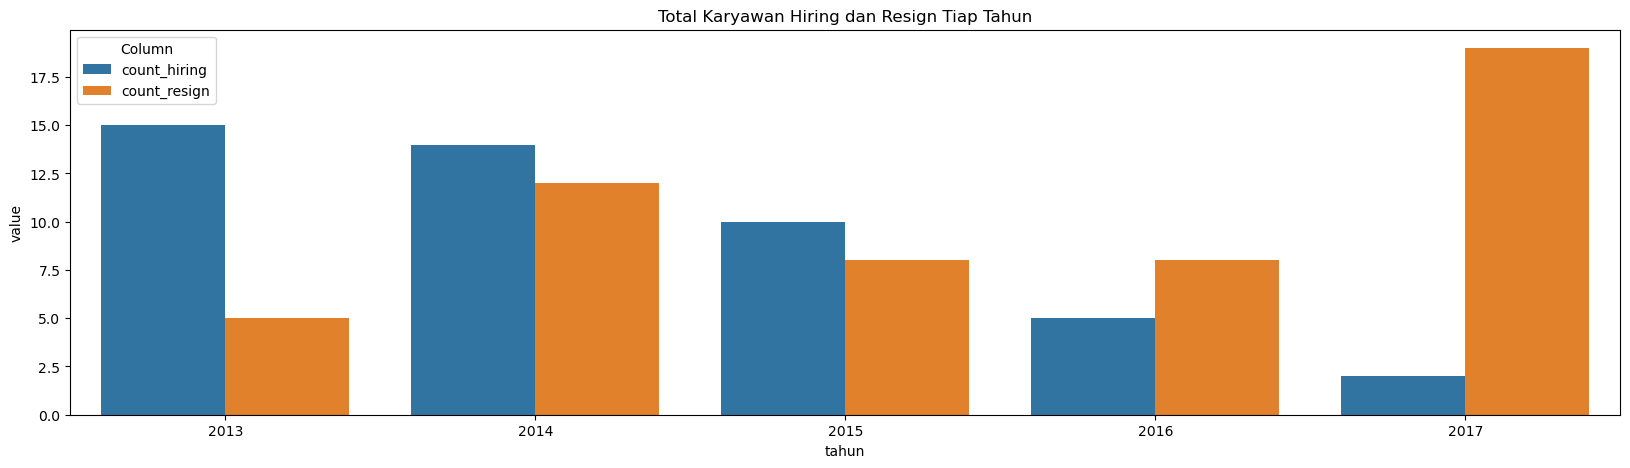

In [47]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(data=data_long, x='tahun', y='value', hue='Column')
plt.title("Total Karyawan Hiring dan Resign Tiap Tahun")

# TUGAS 3

### Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 285
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            209 non-null    object        
 1   EnterpriseID                        209 non-null    int64         
 2   StatusPernikahan                    209 non-null    object        
 3   JenisKelamin                        209 non-null    object        
 4   StatusKepegawaian                   209 non-null    object        
 5   Pekerjaan                           209 non-null    object        
 6   JenjangKarir                        209 non-null    object        
 7   PerformancePegawai                  209 non-null    object        
 8   AsalDaerah                          209 non-null    object        
 9   HiringPlatform                      209 non-null    object        
 10  SkorSurveyEngagement      

In [49]:
jumlah_employee_work = df.groupby(['Pekerjaan','Resign']).agg({'Username' : 'count'})
jumlah_employee_work = jumlah_employee_work.reset_index()
jumlah_employee_work.columns = ['Pekerjaan', 'Resign', 'Count']
jumlah_employee_work

,Pekerjaan,Resign,Count
0,Data Analyst,no,4
1,Data Analyst,yes,8
2,Data Engineer,no,5
3,Data Engineer,yes,3
4,DevOps Engineer,no,1
5,Digital Product Manager,no,1
6,Product Design (UI & UX),no,11
7,Product Design (UI & UX),yes,8
8,Product Design (UX Researcher),no,1
9,Product Manager,no,6


In [50]:
jew_pivot = pd.pivot_table(jumlah_employee_work,
               index = ['Pekerjaan'],
               columns = ['Resign'],
               values = ['Count']
              )
jew_pivot = jew_pivot.reset_index()
jew_pivot.columns = ['Pekerjaan','Resign_no','Resign_yes']
jew_pivot

,Pekerjaan,Resign_no,Resign_yes
0,Data Analyst,4.0,8.0
1,Data Engineer,5.0,3.0
2,DevOps Engineer,1.0,NaN
3,Digital Product Manager,1.0,NaN
4,Product Design (UI & UX),11.0,8.0
5,Product Design (UX Researcher),1.0,NaN
6,Product Manager,6.0,5.0
7,Scrum Master,2.0,NaN
8,Software Architect,1.0,NaN
9,Software Engineer (Android),10.0,7.0


### Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign)

In [51]:
jew_pivot['Resign_yes'] = jew_pivot['Resign_yes'].fillna(0)

In [52]:
jew_pivot['jumlah_employee'] = jew_pivot['Resign_no']+jew_pivot['Resign_yes']

In [53]:
jew_pivot

,Pekerjaan,Resign_no,Resign_yes,jumlah_employee
0,Data Analyst,4.0,8.0,12.0
1,Data Engineer,5.0,3.0,8.0
2,DevOps Engineer,1.0,0.0,1.0
3,Digital Product Manager,1.0,0.0,1.0
4,Product Design (UI & UX),11.0,8.0,19.0
5,Product Design (UX Researcher),1.0,0.0,1.0
6,Product Manager,6.0,5.0,11.0
7,Scrum Master,2.0,0.0,2.0
8,Software Architect,1.0,0.0,1.0
9,Software Engineer (Android),10.0,7.0,17.0


In [54]:
jew_pivot['presentase_employee'] = jew_pivot['Resign_no']/jew_pivot['jumlah_employee']
jew_pivot

,Pekerjaan,Resign_no,Resign_yes,jumlah_employee,presentase_employee
0,Data Analyst,4.0,8.0,12.0,0.333333
1,Data Engineer,5.0,3.0,8.0,0.625000
2,DevOps Engineer,1.0,0.0,1.0,1.000000
3,Digital Product Manager,1.0,0.0,1.0,1.000000
4,Product Design (UI & UX),11.0,8.0,19.0,0.578947
5,Product Design (UX Researcher),1.0,0.0,1.0,1.000000
6,Product Manager,6.0,5.0,11.0,0.545455
7,Scrum Master,2.0,0.0,2.0,1.000000
8,Software Architect,1.0,0.0,1.0,1.000000
9,Software Engineer (Android),10.0,7.0,17.0,0.588235


### Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya
### Hint: Perhatikan jenis plot yang digunakan

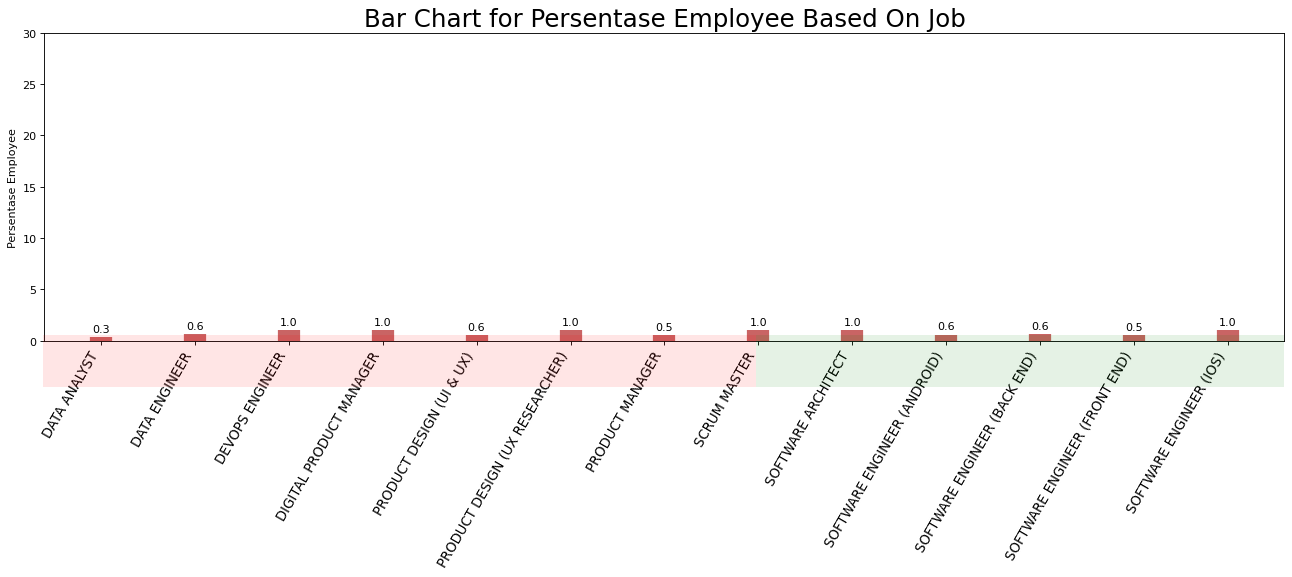

In [55]:
# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(20,5), facecolor='white', dpi= 80)
ax.vlines(x=jew_pivot.index, ymin=0, ymax=jew_pivot.presentase_employee, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(jew_pivot.presentase_employee):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Persentase Employee Based On Job', fontdict={'size':22})
ax.set(ylabel='Persentase Employee', ylim=(0, 30))
plt.xticks(jew_pivot.index, jew_pivot.Pekerjaan.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()


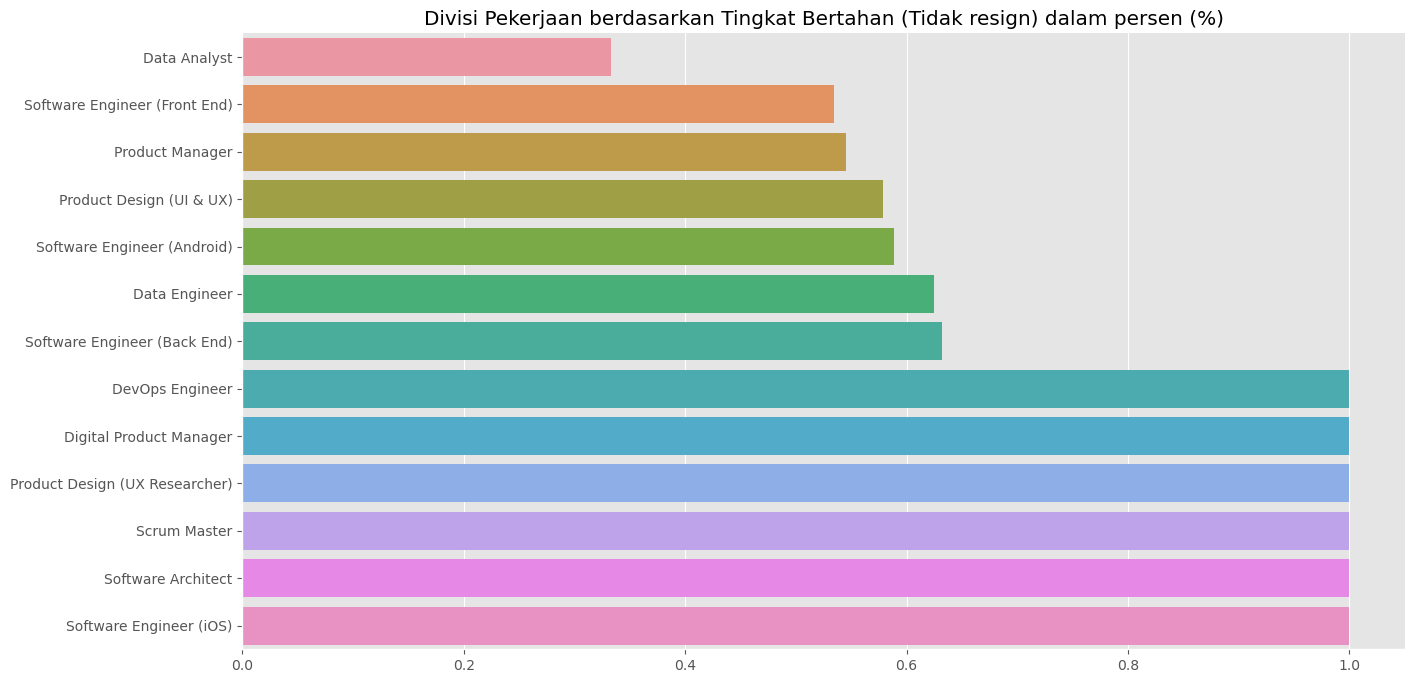

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

ax1 = sns.barplot(y = 'Pekerjaan', 
                  x = 'presentase_employee', 
                  data = jew_pivot.sort_values(["presentase_employee"]))
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Divisi Pekerjaan berdasarkan Tingkat Bertahan (Tidak resign) dalam persen (%)')
plt.show()

### Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 285
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            209 non-null    object        
 1   EnterpriseID                        209 non-null    int64         
 2   StatusPernikahan                    209 non-null    object        
 3   JenisKelamin                        209 non-null    object        
 4   StatusKepegawaian                   209 non-null    object        
 5   Pekerjaan                           209 non-null    object        
 6   JenjangKarir                        209 non-null    object        
 7   PerformancePegawai                  209 non-null    object        
 8   AsalDaerah                          209 non-null    object        
 9   HiringPlatform                      209 non-null    object        
 10  SkorSurveyEngagement      

In [58]:
df.head(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign,TanggalResign_tahun,TanggalHiring_tahun
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,no,<NA>,2011
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,yes,2018,2014
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,yes,2014,2011


In [59]:
filtered_df = df[(df['Pekerjaan'] == 'Data Analyst') & (df['Resign'] == 'yes')]
filtered_df

# Group by 'division' and count occurrences
#grouped_JenjangKarir = filtered_df.groupby('JenjangKarir').size()

# Group by 'resignation' and count occurrences
#grouped_Resign = filtered_df.groupby('Resign').size()

# Create a new DataFrame combining the counts
#result_df = pd.DataFrame({'Jenjang Karir Count': grouped_JenjangKarir, 'Resign Yes Count': grouped_Resign})
#result_df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resign,TanggalResign_tahun,TanggalHiring_tahun
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,yes,2018,2014
18,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,...,hushedSeahorse7404@icloud.com,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,yes,2017,2012
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,...,sincereGatorade8842@icloud.com,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,yes,2017,2016
102,brainyFish3,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,...,brainyFish3571@hotmail.com,Sarjana,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,yes,2018,2012
106,troubledThrushe9,101192,-,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,...,troubledThrushe9146@proton.com,Sarjana,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-08-19,yes,2014,2013
108,jealousIguana3,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,...,jealousIguana3026@gmail.com,Sarjana,toxic_culture,1976-09-22,2015-03-30,2020-1-21,2014-08-19,yes,2014,2015
233,jumpyBuck8,100317,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,...,jumpyBuck8498@outlook.com,Magister,toxic_culture,1970-02-11,2009-07-06,2020-1-25,2015-06-05,yes,2015,2009
239,finickySwift5,105296,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,...,finickySwift5808@icloud.com,Magister,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-06-25,yes,2017,2011


In [60]:
filtered = filtered_df.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).agg({'Username' : 'count'})
filtered = filtered.reset_index()
filtered.columns = ['JenjangKarir','PerformancePegawai','AlasanResign', 'Count']
filtered

,JenjangKarir,PerformancePegawai,AlasanResign,Count
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [61]:
filtered_pivot = pd.pivot_table(filtered,
               index = ['JenjangKarir'],
               columns = ['PerformancePegawai','AlasanResign'],
               values = ['Count']
              )
filtered_pivot = filtered_pivot.reset_index()
filtered_pivot.columns = ['JenjangKarir','Bagus_toxic_culture','Bagus_internal_conflict','Biasa_toxic_culture','Biasa_internal_conflict',
                         'Sangat_bagus_toxic_culture', 'Sangat_kurang_toxic_culture']
filtered_pivot

,JenjangKarir,Bagus_toxic_culture,Bagus_internal_conflict,Biasa_toxic_culture,Biasa_internal_conflict,Sangat_bagus_toxic_culture,Sangat_kurang_toxic_culture
0,Freshgraduate_program,1,1,1,1,3,1


In [62]:
data_long2 = filtered_pivot.melt(id_vars='JenjangKarir', var_name='Column')

Text(0.5, 1.0, 'Jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign')

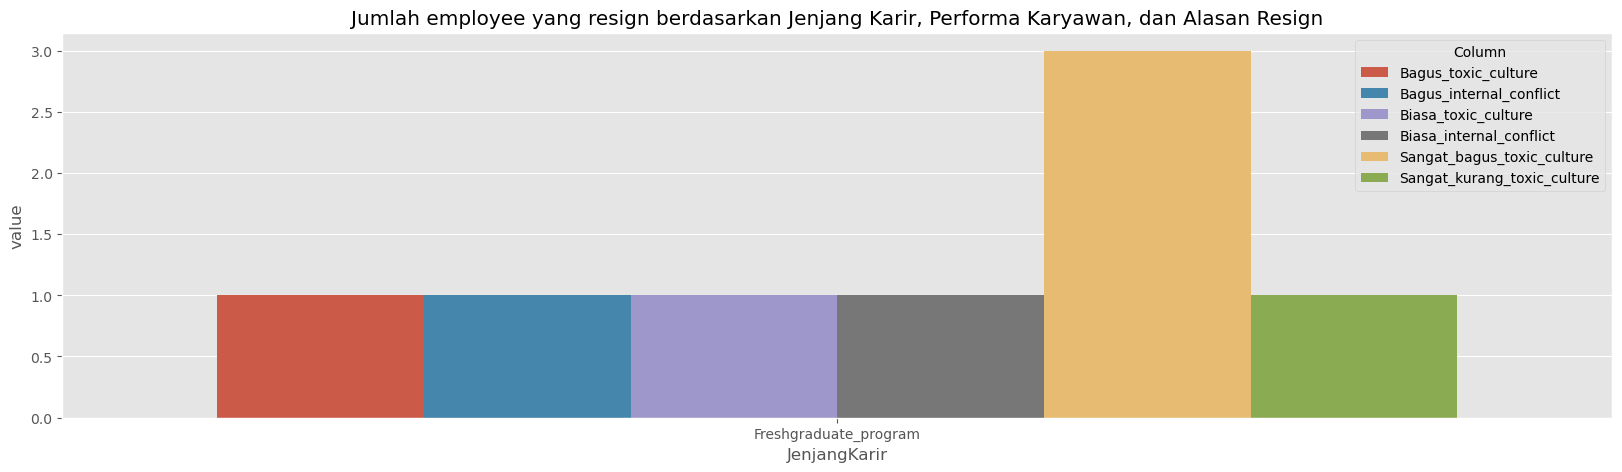

In [63]:
fig = plt.figure(figsize = (20, 5))
sns.barplot(data=data_long2, x='JenjangKarir', y='value', hue='Column')
plt.title("Jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign")

# TUGAS 4

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 285
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            209 non-null    object        
 1   EnterpriseID                        209 non-null    int64         
 2   StatusPernikahan                    209 non-null    object        
 3   JenisKelamin                        209 non-null    object        
 4   StatusKepegawaian                   209 non-null    object        
 5   Pekerjaan                           209 non-null    object        
 6   JenjangKarir                        209 non-null    object        
 7   PerformancePegawai                  209 non-null    object        
 8   AsalDaerah                          209 non-null    object        
 9   HiringPlatform                      209 non-null    object        
 10  SkorSurveyEngagement      

In [65]:
numerical_df = df.select_dtypes(include=['float', 'int64'])

In [66]:
numerical_df.columns

Index(['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TanggalResign_tahun', 'TanggalHiring_tahun'],
      dtype='object')

In [67]:
nums = ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TanggalResign_tahun', 'TanggalHiring_tahun']

In [68]:
numerical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,209.0,106041.339713,4065.710851,100301.0,101345.0,106225.0,110612.0,111703.0
SkorSurveyEngagement,209.0,3.086124,0.861712,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,209.0,3.918660,0.924083,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,209.0,1.076555,2.195685,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,209.0,0.464115,1.372779,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,209.0,10.808612,7.221211,1.0,5.0,10.0,16.0,55.0
TanggalResign_tahun,86.0,2016.651163,1.914449,2013.0,2015.0,2017.0,2018.0,2020.0
TanggalHiring_tahun,209.0,2012.641148,1.968607,2006.0,2011.0,2013.0,2014.0,2018.0


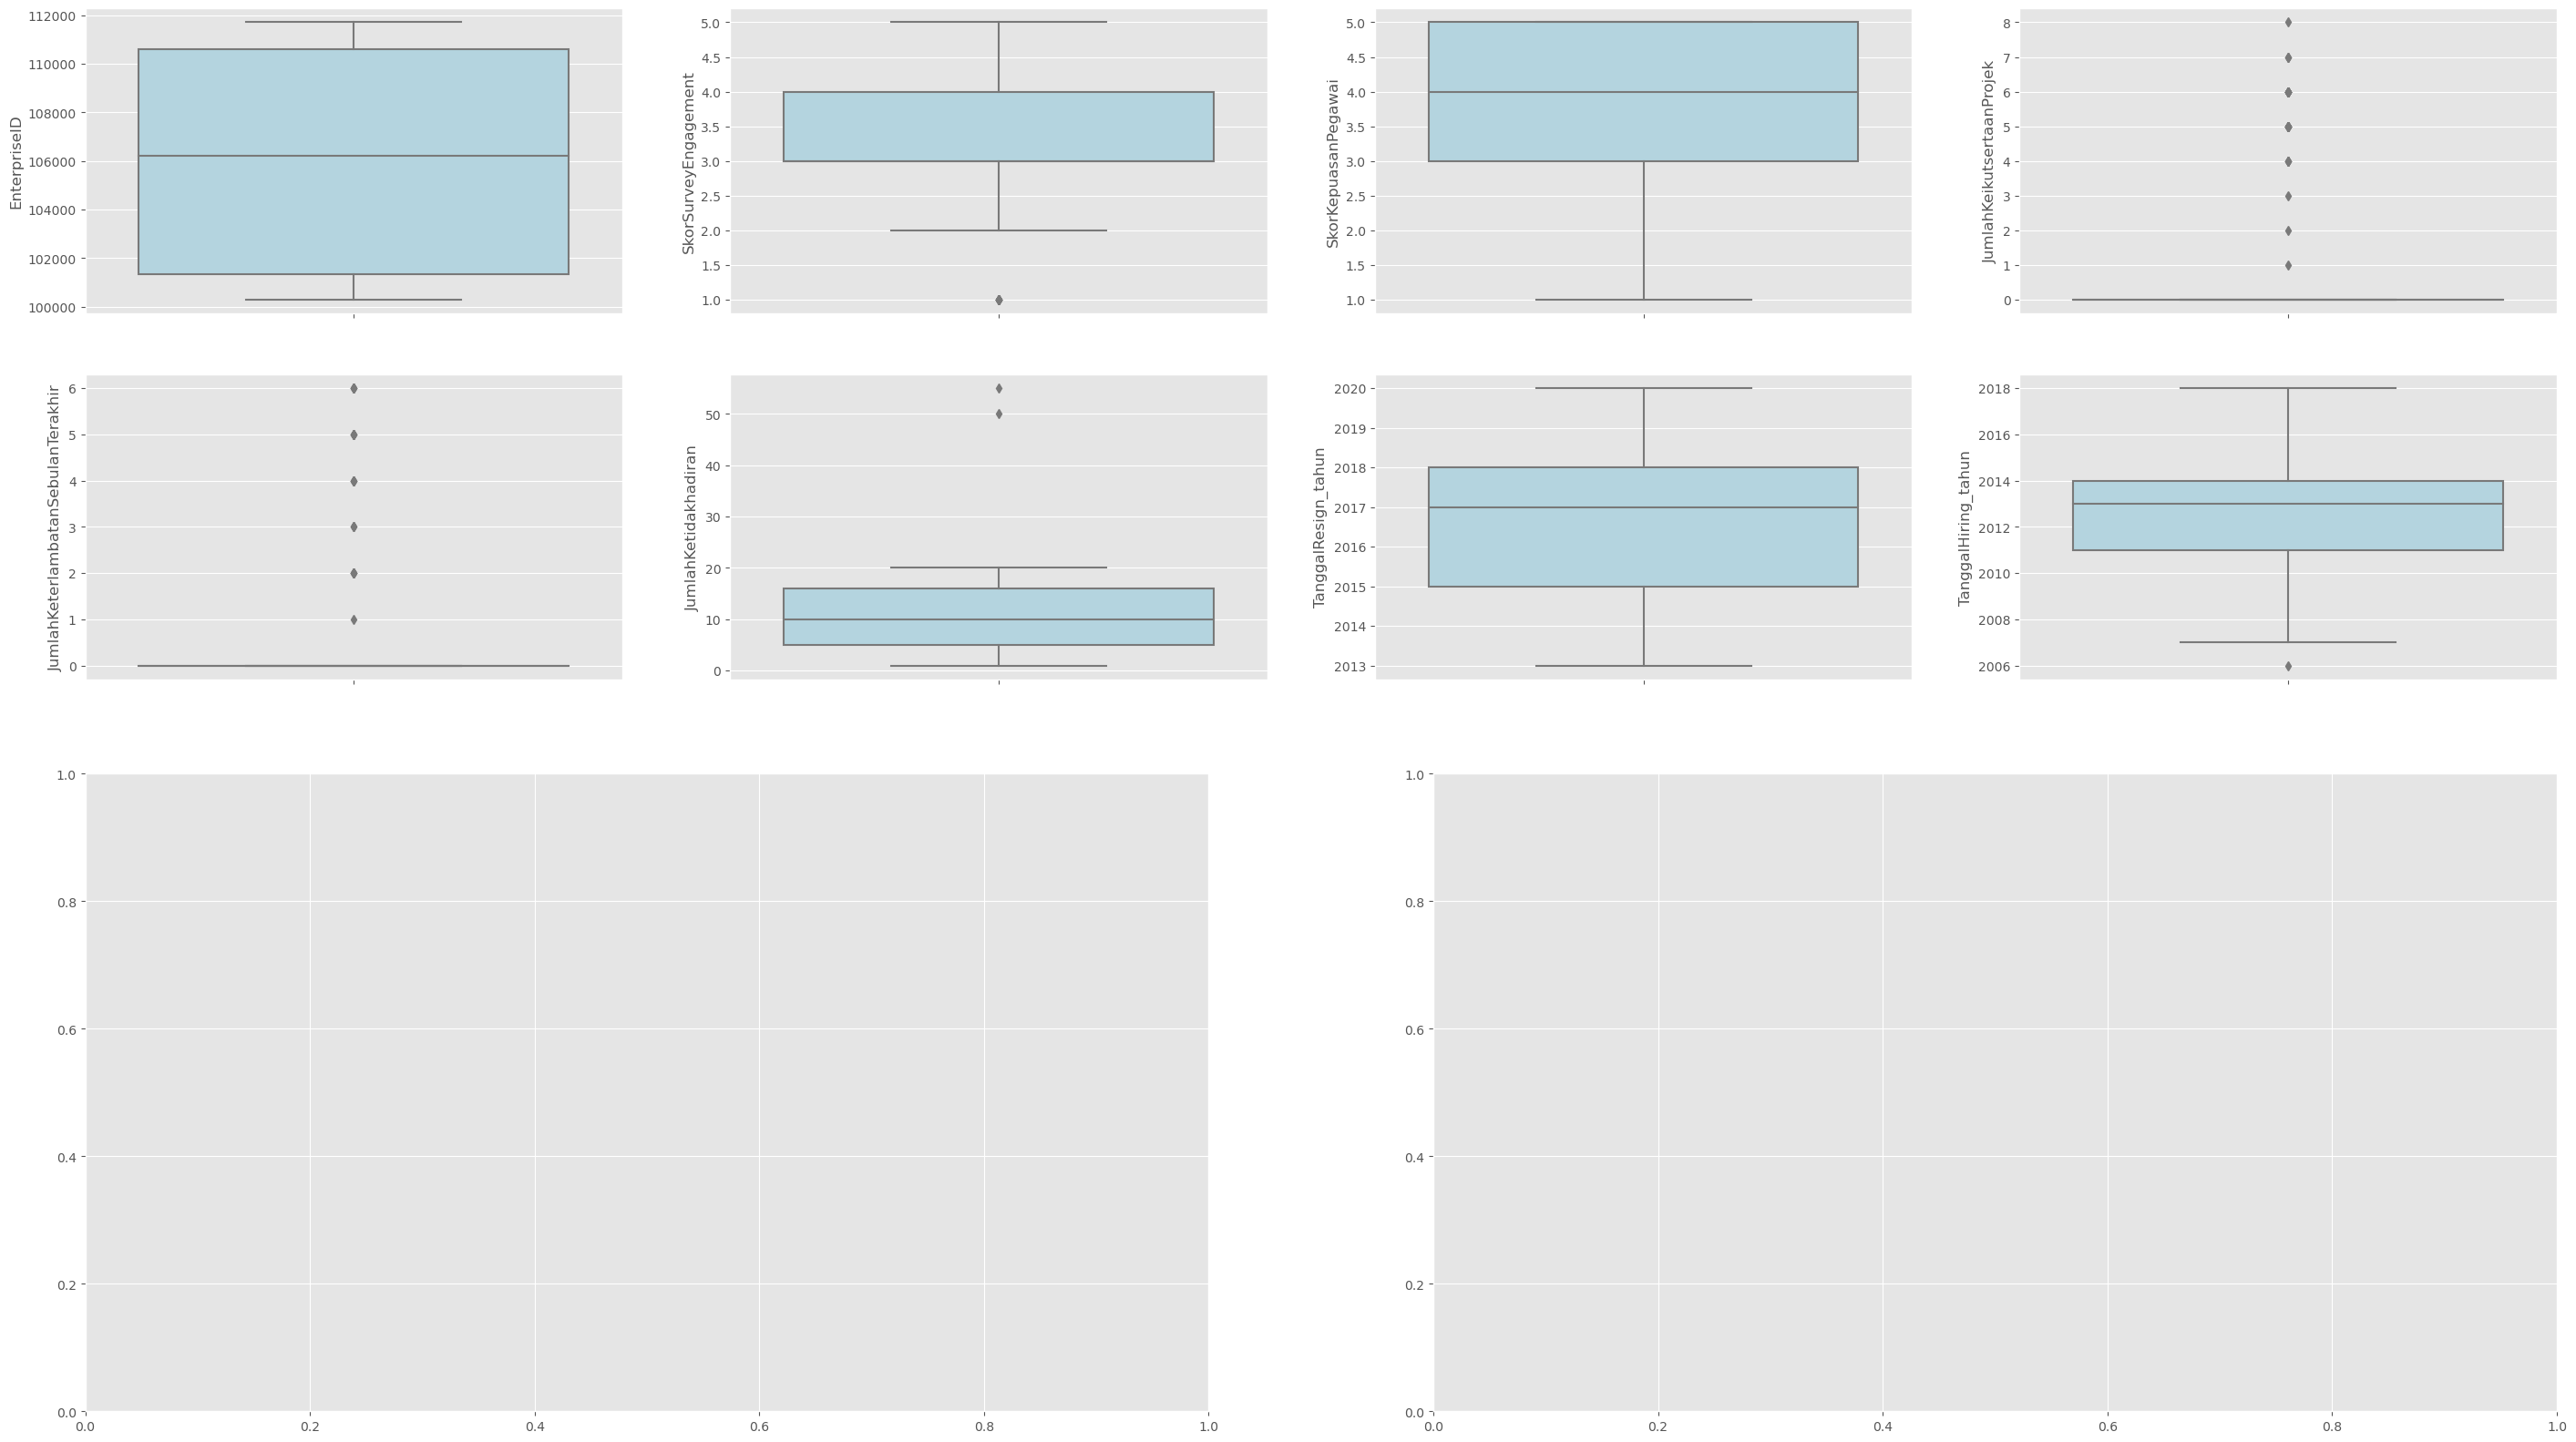

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(35, 20))
for i in range(0, len(nums)):
  plt.subplot(4,4, i+1)
  sns.boxplot(y=df[nums[i]], color='lightblue', orient='v')

In [70]:
from scipy import stats

In [71]:
# Handling with zscore
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['SkorSurveyEngagement', 'SkorKepuasanPegawai','JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 209
Jumlah baris setelah memfilter outlier: 207


In [72]:
object_columns = df.select_dtypes(include='object')

In [73]:
object_columns.columns

Index(['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian',
       'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan',
       'AlasanResign', 'TanggalLahir', 'TanggalPenilaianKaryawan', 'Resign'],
      dtype='object')

In [74]:
print("Status Pernikahan:",df['StatusPernikahan'].unique(),
     "Jenis Kelamin:", df['JenisKelamin'].unique(),
     "StatusKepegawaian:", df['StatusKepegawaian'].unique(),
     "Pekerjaan:", df['Pekerjaan'].unique(),
     "JenjangKarir:", df['JenjangKarir'].unique(),
     "PerformancePegawai:", df['PerformancePegawai'].unique(),
     "AsalDaerah:", df['AsalDaerah'].unique(), 
     "HiringPlatform:", df['HiringPlatform'].unique(),
     "TingkatPendidikan:", df['TingkatPendidikan'].unique(),
     "AlasanResign:", df['AlasanResign'].unique(),
     "Resign:", df['Resign'].unique())

Status Pernikahan: ['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-'] Jenis Kelamin: ['Pria' 'Wanita'] StatusKepegawaian: ['Outsource' 'FullTime' 'Internship'] Pekerjaan: ['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Product Design (UX Researcher)'
 'Product Design (UI & UX)' 'Digital Product Manager' 'Data Engineer'
 'Software Engineer (iOS)' 'Scrum Master' 'DevOps Engineer'
 'Software Architect'] JenjangKarir: ['Freshgraduate_program' 'Senior_level' 'Mid_level'] PerformancePegawai: ['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang'] AsalDaerah: ['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Barat'] HiringPlatform: ['Employee_Referral' 'Website' 'Indeed' 'LinkedIn' 'CareerBuilder'
 'Diversity_Job_Fair' 'Google_Search' 'On-line_Web_application' 'Other'] TingkatPendidikan: ['Magister' 'Sarjana' 'Doktor'] AlasanResign: ['masih_bekerja' 'toxic_culture' 'jam_kerja' 'gan

In [75]:
#df['Pekerjaan_AlasanResign'] = df['Pekerjaan'] + "_" + df['AlasanResign']

In [76]:
#df = df.drop(['Pekerjaan', 'AlasanResign'], axis=1)

#### Encoding

In [77]:
#StatusPernikahan, JenisKelamin, StatusKepegawaian, JenjangKarir, PerformancePegawai, TingkatPendidikan, Resign

In [78]:
print("Status Pernikahan:",df['StatusPernikahan'].unique(),
     "Jenis Kelamin:", df['JenisKelamin'].unique(),
     "StatusKepegawaian:", df['StatusKepegawaian'].unique(),
     "JenjangKarir:", df['JenjangKarir'].unique(),
     "PerformancePegawai:", df['PerformancePegawai'].unique(),
     "TingkatPendidikan:", df['TingkatPendidikan'].unique(),
     "HiringPlatform",df['HiringPlatform'].unique(),
     "Resign:", df['Resign'].unique())

Status Pernikahan: ['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-'] Jenis Kelamin: ['Pria' 'Wanita'] StatusKepegawaian: ['Outsource' 'FullTime' 'Internship'] JenjangKarir: ['Freshgraduate_program' 'Senior_level' 'Mid_level'] PerformancePegawai: ['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang'] TingkatPendidikan: ['Magister' 'Sarjana' 'Doktor'] HiringPlatform ['Employee_Referral' 'Website' 'Indeed' 'LinkedIn' 'CareerBuilder'
 'Diversity_Job_Fair' 'Google_Search' 'On-line_Web_application' 'Other'] Resign: ['no' 'yes']


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 285
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            207 non-null    object        
 1   EnterpriseID                        207 non-null    int64         
 2   StatusPernikahan                    207 non-null    object        
 3   JenisKelamin                        207 non-null    object        
 4   StatusKepegawaian                   207 non-null    object        
 5   Pekerjaan                           207 non-null    object        
 6   JenjangKarir                        207 non-null    object        
 7   PerformancePegawai                  207 non-null    object        
 8   AsalDaerah                          207 non-null    object        
 9   HiringPlatform                      207 non-null    object        
 10  SkorSurveyEngagement      

In [80]:
divisi_data = ['Data Analyst', 'Data Engineer']
divisi_product = ['Digital Product Manager', 'Product Design (UI & UX)', 'Product Design (UX Researcher)', 'Product Manager', 'Scrum Master']
divisi_engineering = ['Software Architect', 'Software Engineer (Android)', 'Software Engineer (Back End)','Software Engineer (Front End)', 
                      'Software Engineer (iOS)', 'DevOps Engineer']
df["Pekerjaan"] = df["Pekerjaan"].map(lambda x: "divisi_engineering" if x in divisi_engineering else \
                                                       "divisi_data" if x in divisi_data else "divisi_product")

web_application = ['Website', 'Indeed', 'LinkedIn', 'CareerBuilder', 'Google_Search', 'On-line_Web_application']
employee_referral = ['Employee_Referral']
job_fair_other = ['Diversity_Job_Fair', 'Other']

df["HiringPlatform"] = df["HiringPlatform"].map(lambda x: "web_application" if x in web_application else \
                                                       "employee_referral" if x in employee_referral else "job_fair_other")
df["AsalDaerah"] = df["AsalDaerah"].map(lambda x: x.replace(" ", "_"))

In [81]:
mapping_StatusPernikahan = {
    'Belum_menikah' : 0,
    'Menikah' : 1,
    'Bercerai' : 2,
    'Lainnya' : 3,
    '-' : 3
}

mapping_JenisKelamin = {
    'Pria'  : 0,
    'Wanita' : 1

}

mapping_StatusKepegawaian = {
    'Outsource'  : 0,
    'FullTime' : 1,
    'Internship' : 2

}

mapping_JenjangKarir = {
    'Freshgraduate_program'  : 0,
    'Mid_level' : 1,
    'Senior_level' : 2

}

mapping_PerformancePegawai = {
    'Sangat_bagus'  : 0,
    'Sangat_kurang' : 1,
    'Bagus' : 2,
    'Biasa' : 3,
    'Kurang' : 4

}

mapping_TingkatPendidikan = {
    'Sarjana'  : 0,
    'Magister' : 1,
    'Doktor'  : 2

}


mapping_Resign = {
    'no'  : 0,
    'yes' : 1

}

df['StatusPernikahan'] = df['StatusPernikahan'].map(mapping_StatusPernikahan)
df['JenisKelamin'] = df['JenisKelamin'].map(mapping_JenisKelamin)
df['StatusKepegawaian'] = df['StatusKepegawaian'].map(mapping_StatusKepegawaian)
df['JenjangKarir'] = df['JenjangKarir'].map(mapping_JenjangKarir)
df['PerformancePegawai'] = df['PerformancePegawai'].map(mapping_PerformancePegawai)
df['TingkatPendidikan'] = df['TingkatPendidikan'].map(mapping_TingkatPendidikan)
df['Resign'] = df['Resign'].map(mapping_Resign)

In [82]:
df['HiringPlatform'].unique()

array(['employee_referral', 'web_application', 'job_fair_other'],
      dtype=object)

In [83]:
# Perform one-hot encoding on 'Pekerjaan' and 'HiringPlatform' columns
onehots = pd.get_dummies(df[['Pekerjaan', 'HiringPlatform']])

# Join the one-hot encoded DataFrame with the original DataFrame
df = df.join(onehots)

# If you intended to drop the original columns after one-hot encoding
df.drop(['Pekerjaan', 'HiringPlatform'], axis=1, inplace=True)

### Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yangada (imbalanced learning)

In [84]:
axz = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai','JumlahKeikutsertaanProjek','TingkatPendidikan',
       'Data Analyst', 'Data Engineer', 'DevOps Engineer', 'Digital Product Manager',
       'Product Design (UI & UX)', 'Product Design (UX Researcher)', 'Product Manager', 'Scrum Master', 'Software Architect',
       'Software Engineer (Android)', 'Software Engineer (Back End)','Software Engineer (Front End)', 'Software Engineer (iOS)']

In [85]:
jml = len(axz)
print(jml)

22


In [84]:
df.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'NomorHP', 'Email', 'TingkatPendidikan',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign', 'Resign',
       'TanggalResign_tahun', 'TanggalHiring_tahun', 'Pekerjaan_divisi_data',
       'Pekerjaan_divisi_engineering', 'Pekerjaan_divisi_product',
       'HiringPlatform_employee_referral', 'HiringPlatform_job_fair_other',
       'HiringPlatform_web_application'],
      dtype='object')

In [85]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         121
Resign                                  0
TanggalResign_tahun                   121
TanggalHiring_tahun               

In [86]:
df = df.fillna(df.mode().iloc[0])

In [87]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
Resign                                0
TanggalResign_tahun                   0
TanggalHiring_tahun                   0
Pekerjaan_divisi_data                 0


In [88]:
X = df[['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai','JumlahKeikutsertaanProjek','TingkatPendidikan',
        'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Pekerjaan_divisi_data', 'Pekerjaan_divisi_engineering', 
        'Pekerjaan_divisi_product', 'HiringPlatform_employee_referral', 'HiringPlatform_job_fair_other',
       'HiringPlatform_web_application']]
y = df['Resign']  # Target variable 

In [89]:
X.isnull().sum()

StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
JenjangKarir                          0
PerformancePegawai                    0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
TingkatPendidikan                     0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
Pekerjaan_divisi_data                 0
Pekerjaan_divisi_engineering          0
Pekerjaan_divisi_product              0
HiringPlatform_employee_referral      0
HiringPlatform_job_fair_other         0
HiringPlatform_web_application        0
dtype: int64

In [90]:
X.duplicated().sum()

0

In [91]:
import imblearn

In [92]:
df['Resign'] = df['Resign']>0.9
print(df['Resign'].value_counts())

False    121
True      86
Name: Resign, dtype: int64


In [93]:
from imblearn.over_sampling import SMOTE

In [228]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [229]:
print(len(X))
print(len(y))

207
207


### Split Data Train & Data Test

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Over sampling with SMOTE

In [96]:
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

In [97]:
X_train.shape

(144, 17)

In [98]:
y_train.shape

(144,)

In [99]:
print('Target setelah oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target setelah oversampling:
0    81
1    81
Name: Resign, dtype: int64


### Modeling

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())
    
def show_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [102]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

#### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
eval_classification(dt)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.47
Recall (Test Set): 0.65
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.61
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.5148039215686274


#### Hyperparameter Tuning Decision Tree

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
model.fit(X_train_smote, y_train_smote)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.48
Recall (Test Set): 0.48
F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.57
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8496561376679763
roc_auc (crossval test): 0.5442712418300654


### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
eval_classification(logreg)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.44
Recall (Test Set): 0.48
F1-Score (Test Set): 0.46
roc_auc (test-proba): 0.52
roc_auc (train-proba): 0.67
roc_auc (crossval train): 0.6853221869204876
roc_auc (crossval test): 0.5103518518518518


### Hyperparameter Tuning Logistic Regression

In [111]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
rs.fit(X_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.51
Precision (Test Set): 0.38
Recall (Test Set): 0.52
F1-Score (Test Set): 0.44
roc_auc (test-proba): 0.53
roc_auc (train-proba): 0.58
roc_auc (crossval train): 0.6583578870813228
roc_auc (crossval test): 0.5122494553376906


### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote) 
eval_classification(knn)

Accuracy (Test Set): 0.49
Precision (Test Set): 0.37
Recall (Test Set): 0.57
F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.74
roc_auc (crossval train): 0.7284732567388228
roc_auc (crossval test): 0.4914389978213508


### Hyperparameter KNN

In [113]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.40
Recall (Test Set): 0.09
F1-Score (Test Set): 0.14
roc_auc (test-proba): 0.54
roc_auc (train-proba): 0.65
roc_auc (crossval train): 0.6912732482429698
roc_auc (crossval test): 0.46930555555555553


### Ada Boost

In [103]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_smote, y_train_smote)
eval_classification(ada)

Accuracy (Test Set): 0.52
Precision (Test Set): 0.33
Recall (Test Set): 0.30
F1-Score (Test Set): 0.32
roc_auc (test-proba): 0.46
roc_auc (train-proba): 0.78
roc_auc (crossval train): 0.8060802294173308
roc_auc (crossval test): 0.48111328976034856


### Hyperparameter Tuning Ada Boost

In [104]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuned.fit(X_train_smote,y_train_smote)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.52
Precision (Test Set): 0.36
Recall (Test Set): 0.39
F1-Score (Test Set): 0.37
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.75
roc_auc (crossval train): 0.7206789889495318
roc_auc (crossval test): 0.5153398692810457


### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
eval_classification(rf)

Accuracy (Test Set): 0.57
Precision (Test Set): 0.42
Recall (Test Set): 0.43
F1-Score (Test Set): 0.43
roc_auc (test-proba): 0.51
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.5540996732026144


### Hyperparameter Tuning Random Forest

In [106]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.54
Precision (Test Set): 0.38
Recall (Test Set): 0.43
F1-Score (Test Set): 0.41
roc_auc (test-proba): 0.53
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9021668453725431
roc_auc (crossval test): 0.527587145969499


### XGBoost

In [108]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_smote, y_train_smote)
eval_classification(xg)

Accuracy (Test Set): 0.52
Precision (Test Set): 0.35
Recall (Test Set): 0.35
F1-Score (Test Set): 0.35
roc_auc (test-proba): 0.53
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.5312494553376906


### Hyperparameter Tuning XGBoost

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train_smote, y_train_smote)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.52
Precision (Test Set): 0.39
Recall (Test Set): 0.57
F1-Score (Test Set): 0.46
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.8484408827777339
roc_auc (crossval test): 0.5561132897603486


### Feature Importance

In [110]:
feature_importances = xg_tuned.best_estimator_.feature_importances_

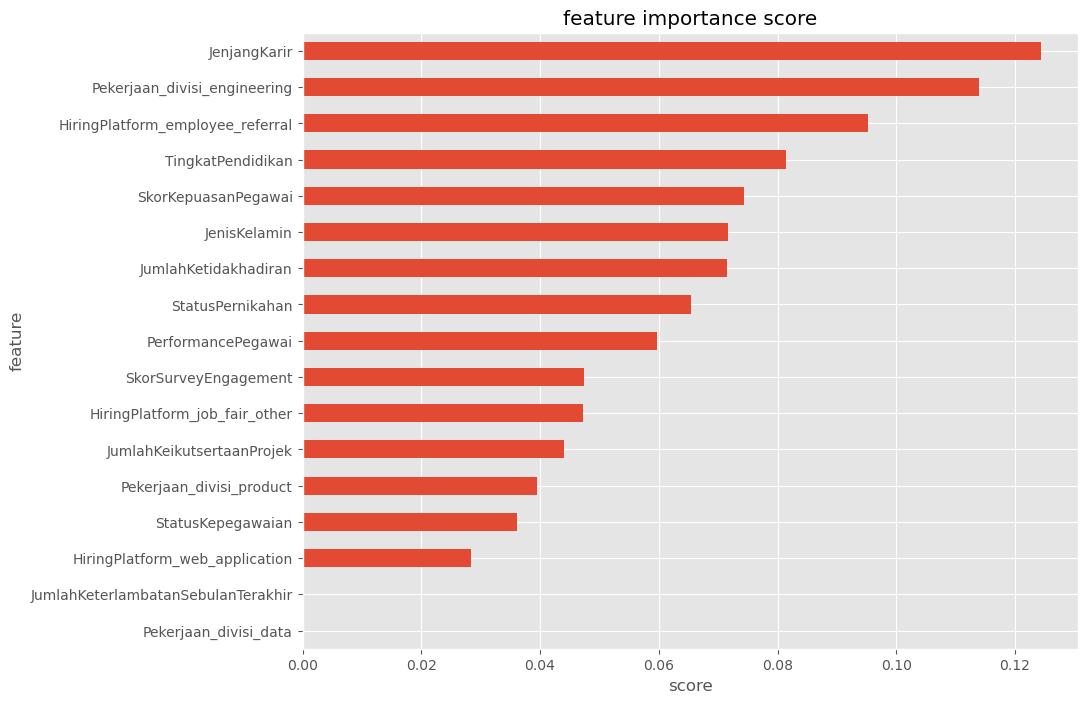

In [111]:
show_feature_importance(xg_tuned.best_estimator_)

### Shap 

In [114]:
import shap

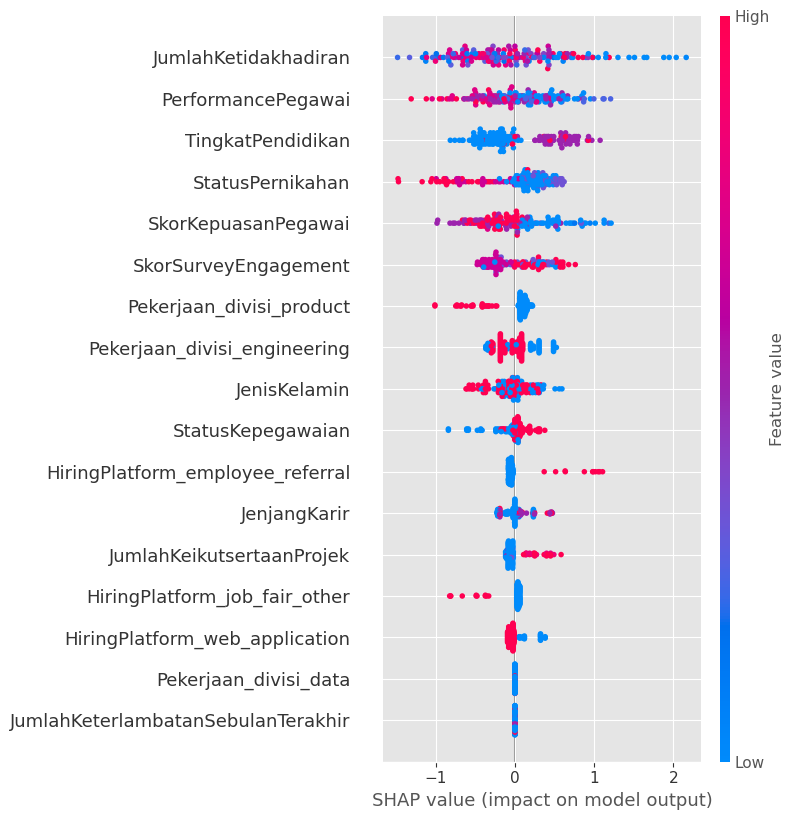

In [115]:
X_shap = shap.sample(X_train_smote, 500)  # You can adjust the number of samples as needed
explainer = shap.Explainer(xg_tuned.best_estimator_)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap, feature_names=X_train_smote.columns)